In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('mnist.csv')

In [50]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [52]:
df.shape

(42000, 785)

In [53]:
X.shape

(42000, 784)

In [54]:
y.shape

(42000,)

In [55]:
y = y.reshape((42000,1))

In [56]:
y.shape

(42000, 1)

In [57]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [58]:
X_train.shape

(33600, 784)

In [59]:
X_test.shape

(8400, 784)

In [60]:
y_train.shape

(33600, 1)

In [61]:
y_test.shape

(8400, 1)

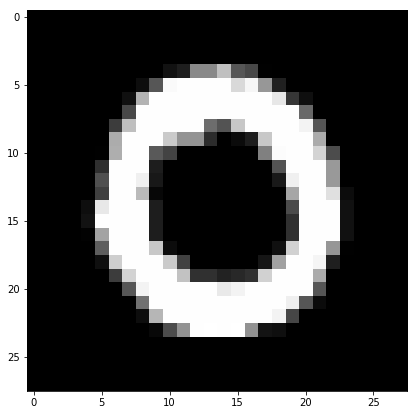

[0]


In [62]:
plt.figure(figsize=(7,7))
index = 1

grid_data = pd.DataFrame(X).iloc[index].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y[index])

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Vishal Vikram Singh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [40]:
pd.DataFrame({'Actual': list(y_test),'Predicted': list(y_pred)})

,Actual,Predicted
0,[3],3
1,[6],6
2,[9],9
3,[5],5
4,[6],6
5,[5],0
6,[6],6
7,[0],0
8,[0],0
9,[1],1


In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[774,   1,   4,   2,   2,   6,  14,   2,   6,   2],
       [  0, 937,   6,   5,   0,   2,   1,   2,   8,   0],
       [  7,   6, 759,  17,  10,   5,  14,  16,  23,   3],
       [  5,   4,  24, 757,   4,  30,   2,   8,  17,  12],
       [  2,   8,   7,   3, 756,   1,   4,   0,  13,  33],
       [  8,   4,   3,  28,   5, 663,  10,   3,  23,   9],
       [  3,   0,   9,   0,   7,  18, 798,   0,   5,   1],
       [  1,   7,  11,   2,  13,   2,   1, 829,   2,  31],
       [  5,  13,   3,  19,   9,  28,   8,   2, 667,  14],
       [  9,   2,   3,  10,  23,   9,   0,  33,  10, 713]], dtype=int64)

In [43]:
classifier.score(X_test,y_test)

0.91107142857142853

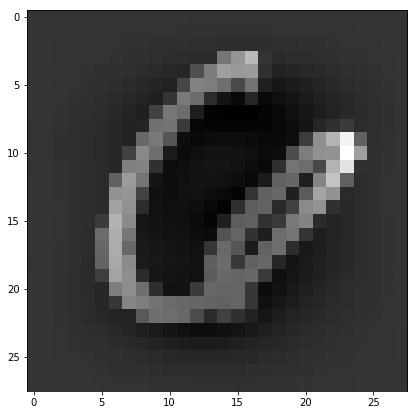

2


In [47]:
plt.figure(figsize=(7,7))
index = 8371

grid_data = pd.DataFrame(X_test).iloc[index].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y_pred[index])